<a href="https://colab.research.google.com/github/makaronaaa/DataSciencePython/blob/main/LinearRegressionHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Failure Clinical records data set at UCI:

"This dataset
contains the medical records of 299 patients who had heart fail-
ure, collected during their follow-up period, where each patient
prole has 13 clinical features."

In [91]:
import pandas as pd
import numpy as npmz
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn import metrics

df=pd.read_csv('/content/sample_data/heart_failure_clinical_records_dataset.csv')
df
#len(df)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


linear models (including linear regression) to model relationships btw different clinical features for heart failure in patients.

Extract two dataframes df 0 for surviving patients (DEATH EVENT
= 0) and df 1 for deceased patients (DEATH EVENT = 1)

In [92]:
df0=df[df['DEATH_EVENT']==0].reset_index(drop=True)
df1=df[df['DEATH_EVENT']==1].reset_index(drop=True)
#df0
len(df1)

96

for each dataset, construct the visual representations of
correponding correlation matrices M0 (from df 0) and M1
(from df 1) and save the plots into two separate les

correlation matrix is a table showing correlation coefficients between sets of variables. tool to summarize a large dataset & to identify, visualize patterns in the given data, allows us to identify variables that have high degrees of correlation. is frequently utilized in conjunction with other types of statistical analysis. For instance, it may be helpful in the analysis of multiple linear regression models. the models contain several independent variables. In multiple linear regression, the correlation matrix determines the correlation coefficients between the independent variables in a model.

--referred to as dimensionality reduction and can be used to improve the runtime and effectiveness of our models.

What is a Correlation Coefficient? A coefficient of correlation is a value between -1 and +1 that denotes both the strength and directionality of a relationship between two variables.

The closer the value is to 1 (or -1), the stronger a relationship.
The closer a number is to 0, the weaker the relationship.

A negative coefficient will tell us that the relationship is negative, meaning that as one value increases, the other decreases. Similarly, a positive coefficient indicates that as one value increases, so does the other.

In [3]:
M0= df0.corr()
print(M0)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.078778                 -0.040552   
anaemia                   0.078778  1.000000                 -0.157555   
creatinine_phosphokinase -0.040552 -0.157555                  1.000000   
diabetes                 -0.078188  0.005003                 -0.047627   
ejection_fraction         0.084411  0.042474                 -0.076834   
high_blood_pressure       0.089570  0.043098                 -0.087824   
platelets                -0.108695 -0.077294                 -0.012940   
serum_creatinine          0.137589  0.003305                 -0.043110   
serum_sodium             -0.019535  0.068118                 -0.002474   
sex                       0.009178 -0.062412                  0.076144   
smoking                  -0.031996 -0.106640                  0.072438   
time                     -0.069851 -0.131258                  0.033722   
DEATH_EVENT                    NaN    

In [4]:
M1 = df1.corr()
print(M1)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.066246                 -0.163145   
anaemia                   0.066246  1.000000                 -0.256866   
creatinine_phosphokinase -0.163145 -0.256866                  1.000000   
diabetes                 -0.149389 -0.049344                  0.035928   
ejection_fraction         0.216885  0.067672                  0.021621   
high_blood_pressure       0.054218  0.013267                 -0.067492   
platelets                 0.072379  0.034991                  0.078808   
serum_creatinine          0.063218  0.068249                 -0.033407   
serum_sodium              0.035503  0.036670                  0.148823   
sex                       0.171186 -0.161678                  0.091893   
smoking                   0.117177 -0.106841                 -0.081419   
time                     -0.187616 -0.113151                  0.023616   
DEATH_EVENT                    NaN    

examine your correlation matrix plots visually and answer
the following:

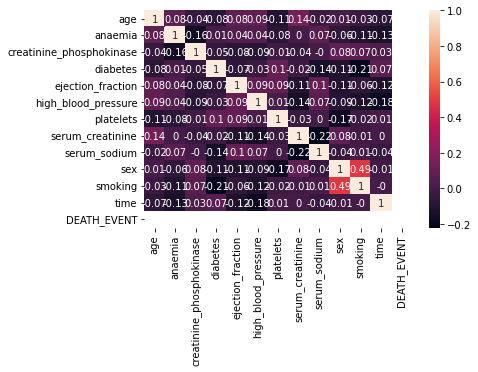

In [5]:
matrix = df0.corr().round(2)
sb.heatmap(matrix, annot=True)
plt.show()

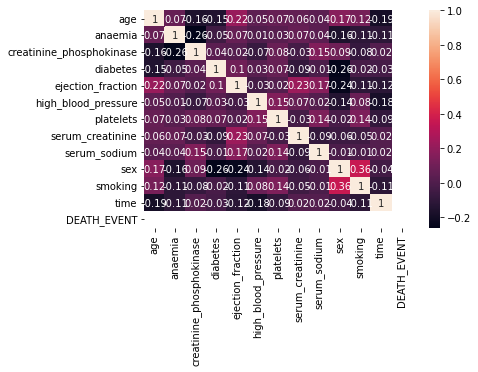

In [6]:
matrix = df1.corr().round(2)
sb.heatmap(matrix, annot=True)
plt.show()

Extract two dataframes
with the above 4 features: df 0 for surviving patients (DEATH EVENT
= 0) and df 1 for deceased patients (DEATH EVENT = 1)
1.creatinine phosphokinase
2. serum creatinine
3. serum sodium
4. platelets

In [7]:
Fdf0=df[['creatinine_phosphokinase','serum_creatinine','serum_sodium','platelets']][df['DEATH_EVENT']==0].reset_index(drop=True)
Fdf1=df[['creatinine_phosphokinase','serum_creatinine','serum_sodium','platelets']][df['DEATH_EVENT']==1].reset_index(drop=True)
Fdf0
Fdf1

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
0,582,1.90,130,265000.00
1,7861,1.10,136,263358.03
2,146,1.30,129,162000.00
3,111,1.90,137,210000.00
4,160,2.70,116,327000.00
...,...,...,...,...
91,582,1.83,134,263358.03
92,166,1.70,127,62000.00
93,2017,1.10,138,314000.00
94,258,1.40,129,198000.00


In [8]:
FM0= Fdf0.corr()
print(FM0)

                          creatinine_phosphokinase  serum_creatinine  \
creatinine_phosphokinase                  1.000000         -0.043110   
serum_creatinine                         -0.043110          1.000000   
serum_sodium                             -0.002474         -0.215651   
platelets                                -0.012940         -0.031217   

                          serum_sodium  platelets  
creatinine_phosphokinase     -0.002474  -0.012940  
serum_creatinine             -0.215651  -0.031217  
serum_sodium                  1.000000   0.001807  
platelets                     0.001807   1.000000  


In [9]:
FM1 = Fdf1.corr()
print(FM1)

                          creatinine_phosphokinase  serum_creatinine  \
creatinine_phosphokinase                  1.000000         -0.033407   
serum_creatinine                         -0.033407          1.000000   
serum_sodium                              0.148823         -0.094011   
platelets                                 0.078808         -0.029384   

                          serum_sodium  platelets  
creatinine_phosphokinase      0.148823   0.078808  
serum_creatinine             -0.094011  -0.029384  
serum_sodium                  1.000000   0.141284  
platelets                     0.141284   1.000000  


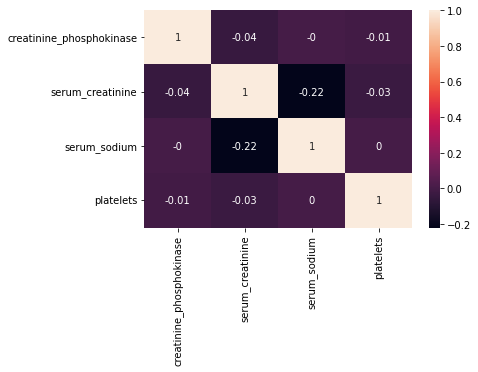

In [10]:
matrix = Fdf0.corr().round(2)
sb.heatmap(matrix, annot=True)
plt.show()

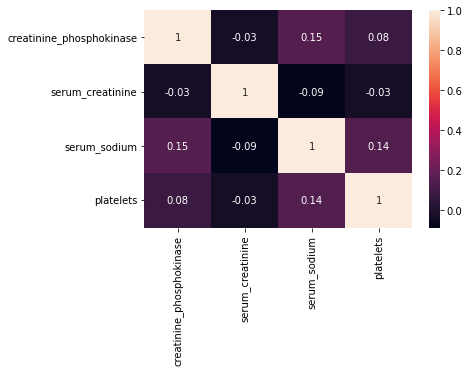

In [11]:
matrix = Fdf1.corr().round(2)
sb.heatmap(matrix, annot=True)
plt.show()

(a) which features have the highest correlation for surviving
patients?

Highest (Negative) correlation for surviving patients of -0.22 can be found among serum_sodium and serum_creatinine.

(b) which features have the lowest correlation for surviving
patients?
Highest correlation for surviving patients of 0 can be found among two pairs of features:

serum_sodium and creatinine_phosphokinase
serum_sodium and platelets
Correlation of 0 indicates that the pairs of features could be independent.

(c) which features have the highest correlation for deceased
patients?
Highest (positive) correlation for deceased patients of 0.15 can be found among serum_sodium and creatinine_phosphokinase.

(d) which features have the lowest correlation for deceased
patients?
Lowest (negative) correlation for deceased patients of -0.03 can be found among two pairs of features:

serum_creatinine and creatinine_phosphokinase
serum_creatinine and platelets

compare a number of different models using linear systems (including linear regres-
sion). You choose one feature X as independent variable X and another feature Y as dependent. Your choice of X and Y
will depend on your facilitator group as follows:

X: serum sodium, Y : serum creatinine

What does high serum sodium mean?
Sodium blood test results that are higher than normal may be a sign of a condition, such as: Dehydration, which may be caused by not drinking enough, diarrhea, or certain medicines called diuretics (water pills) A disorder of the adrenal glands. A kidney disease. 

An increased level of creatinine may be a sign of poor kidney function. Serum creatinine is reported as milligrams of creatinine to a deciliter of blood (mg/dL) or micromoles of creatinine to a liter of blood (micromoles/L).A creatinine level of greater than 1.2 for women and greater than 1.4 for men may be an early sign that the kidneys are not working properly. As kidney disease progresses, the level of creatinine in the blood rises.

In [110]:
x=Fdf0['serum_creatinine'].values #independent variable
y=Fdf0['serum_sodium'].values # output variable (dependent)

now look for the best model (from the list below) that
best explains the relationship for surviving and deceased pa-
tients. Consider surviving patients (DEATH EVENT = 0).

----we will take 50/50 split, t model with
Xtrain and predict Ytest using Xtest. From the predicted val-
ues Pred(yi) we compute the residuals ri = yi 􀀀 Pred(yi). We
can then estimate the loss function (SSE sum of the squared of
residuals)
L

**MODEL 1: **  y = ax + b (simple linear regression)

weights [[-0.05439031]]


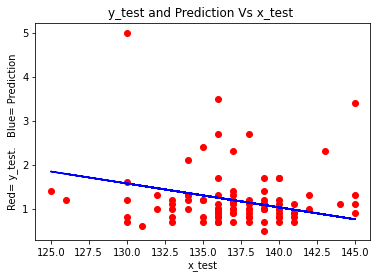

SSE 44.85216850356207


In [68]:
#############     for survivors
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

x=Fdf0['serum_sodium'].values.reshape(-1, 1) 
y=Fdf0['serum_creatinine'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5, random_state=3)

# using the linear regression model
model=LinearRegression()
# fitting the data
model.fit(x_train,y_train) #fit on training
coef_weights= model.coef_
print('weights', coef_weights)

# predicting values
y_pred = model.predict(x_test) #predictfromtest
#print("PREDICT",y_pred)

plt.scatter(x_test,y_test, color='red')
plt.plot(x_test, y_pred, color='blue')
plt.title('y_test and Prediction Vs x_test ')
plt.xlabel('x_test')
plt.ylabel('Red= y_test.   Blue= Prediction')
plt.show()

#then estimate the loss function (SSE sum of the squared of residuals) #error
#calculate sse
sse = np.sum((y_pred - y_test)**2)
print("SSE",sse)

weights [[-0.04909822]]


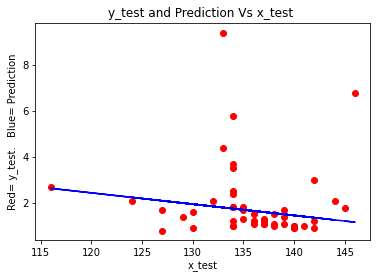

SSE 133.0705870179978


In [111]:
#############     for deceased:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

x=Fdf1['serum_sodium'].values.reshape(-1, 1) 
y=Fdf1['serum_creatinine'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5, random_state=3)

# using the linear regression model
model=LinearRegression()
# fitting the data
model.fit(x_train,y_train) #fit on training
coef_weights= model.coef_
print('weights', coef_weights)

# predicting values
y_pred = model.predict(x_test) #predictfromtest
#print("PREDICT",y_pred)

plt.scatter(x_test,y_test, color='red')
plt.plot(x_test, y_pred, color='blue')
plt.title('y_test and Prediction Vs x_test ')
plt.xlabel('x_test')
plt.ylabel('Red= y_test.   Blue= Prediction')
plt.show()

#then estimate the loss function (SSE sum of the squared of residuals) #error
#calculate sse
sse = np.sum((y_pred - y_test)**2)
print("SSE",sse)

analysis for deceased patients. You will con-
sider the following models for both deceased and surviving pa-
tients:
1. y = ax + b (simple linear regression)
2. y = ax2 + bx + c (quadratic)
3. y = ax3 + bx2 + cx + d (cubic spline)
4. y = a log x + b (GLM - generalized linear model)
5. log y = a log x + b (GLM - generalized linear model)

For each of the model below, do the following (for both deceased and surviving patients)
(a) t the model on Xtrain
(b) print the weights (a; b; : : :)
(c) compute predicted values using Xtest
(d) plot (if possible) predicted and actual values in Xtest
(e) compute (and print) the corresponding loss function

**MODEL 2**:**y = ax2 + bx + c (quadratic) for survivors**




(b) weights: a =  7e-05     weights: b =  -0.074      Intercept: c =  9.92


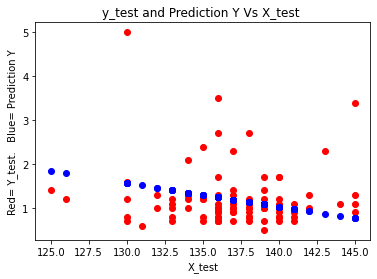

Loss function SSE =  44.78


In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X=Fdf0['serum_sodium']
Y=Fdf0['serum_creatinine']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5, random_state=3) #randomstate when it splits always fixed split
degree= 2
weights =np.polyfit(X_train,Y_train,degree)
model=np.poly1d(weights)
#print out coeficients
[a,b,c] = np.polyfit (X_train, Y_train, 2)
print("(b) weights: a = ", round(a,5), "    weights: b = ", round(b,3), "     Intercept: c = ", round(c,3))
# predicting values
predicted=model(X_test) #predictfromtest

plt.scatter(X_test,Y_test, color='red')
plt.scatter(X_test, predicted, color='blue')
#plt.plot(X_test, predicted, color='blue')  #for more clear graph, I scatter 
plt.title('y_test and Prediction Y Vs X_test ')
plt.xlabel('X_test')
plt.ylabel('Red= Y_test.   Blue= Prediction Y')
plt.show()

#then estimate the loss function (SSE sum of the squared of residuals) #error
#calculate sse
sse = np.sum((Y_test-predicted)**2)
print("Loss function SSE = ", round(sse, 2))


**Model 2: y = ax2 + bx + c (quadratic) for deceased**

(b) weights: a =  -0.00246     weights: b =  0.614      Intercept: c =  -36.263


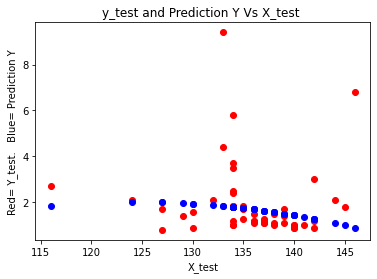

Loss function SSE =  135.98


In [104]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X=Fdf1['serum_sodium']
Y=Fdf1['serum_creatinine']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5, random_state=3) #randomstate when it splits always fixed split
degree= 2
weights =np.polyfit(X_train,Y_train,degree)
model=np.poly1d(weights)
#print out coeficients
[a,b,c] = np.polyfit (X_train, Y_train, 2)
print("(b) weights: a = ", round(a,5), "    weights: b = ", round(b,3), "     Intercept: c = ", round(c,3))
# predicting values
predicted=model(X_test) #predictfromtest

plt.scatter(X_test,Y_test, color='red')
plt.scatter(X_test, predicted, color='blue')
#plt.plot(X_test, predicted, color='blue')  #for more clear graph, I scatter 
plt.title('y_test and Prediction Y Vs X_test ')
plt.xlabel('X_test')
plt.ylabel('Red= Y_test.   Blue= Prediction Y')
plt.show()

#then estimate the loss function (SSE sum of the squared of residuals) #error
#calculate sse
sse = np.sum((Y_test-predicted)**2)
print("Loss function SSE = ", round(sse, 2))

**MODEL 3**:y = ax3 + bx2 + cx + d (cubic spline) for Survivors df0:**





(b) weights: a =  0.0005     weights: b =  -0.196      weights: c =  25.415 Intercept: d =  -1092.317


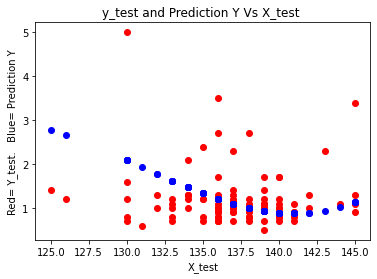

Loss function SSE =  48.96


In [105]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X=np.array(Fdf0['serum_sodium'])
Y=np.array(Fdf0['serum_creatinine'])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5, random_state=3) #randomstate when it splits always fixed split
degree= 3
weights =np.polyfit(X_train,Y_train,3)
model=np.poly1d(weights)
#print out coeficients
[a,b,c, d] = np.polyfit (X_train, Y_train, degree)
print("(b) weights: a = ", round(a,5), "    weights: b = ", round(b,3), "     weights: c = ", round(c,3), "Intercept: d = ", round(d,3))
# predicting values
predicted=model(X_test) #predictfromtest
#print("PREDICT",predicted)

plt.scatter(X_test,Y_test, color='red')
plt.scatter(X_test, predicted, color='blue')
#plt.plot(X_test, predicted, color='blue')  #for more clear graph, I scatter 
plt.title('y_test and Prediction Y Vs X_test ')
plt.xlabel('X_test')
plt.ylabel('Red= Y_test.   Blue= Prediction Y')
plt.show()

#then estimate the loss function (SSE sum of the squared of residuals) #error
#calculate sse
sse = np.sum((predicted - Y_test)**2)
print("Loss function SSE = ", round(sse, 2))


**y = ax3 + bx2 + cx + d (cubic spline) for deceased df1:**

(b) weights: a =  0.00013     weights: b =  -0.055      weights: c =  7.621 Intercept: d =  -347.355


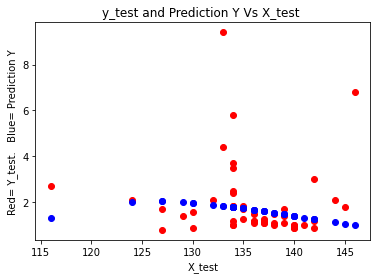

Loss function SSE =  135.2


In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X=np.array(Fdf1['serum_sodium'])
Y=np.array(Fdf1['serum_creatinine'])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5, random_state=3) #randomstate when it splits always fixed split
degree= 3
weights =np.polyfit(X_train,Y_train,3)
model=np.poly1d(weights)
#print out coeficients
[a,b,c, d] = np.polyfit (X_train, Y_train, degree)
print("(b) weights: a = ", round(a,5), "    weights: b = ", round(b,3), "     weights: c = ", round(c,3), "Intercept: d = ", round(d,3))
# predicting values
predicted=model(X_test) #predictfromtest
#print("PREDICT",predicted)

plt.scatter(X_test,Y_test, color='red')
plt.scatter(X_test, predicted, color='blue')
#plt.plot(X_test, predicted, color='blue')  #for more clear graph, I scatter 
plt.title('y_test and Prediction Y Vs X_test ')
plt.xlabel('X_test')
plt.ylabel('Red= Y_test.   Blue= Prediction Y')
plt.show()

#then estimate the loss function (SSE sum of the squared of residuals) #error
#calculate sse
sse = np.sum((predicted - Y_test)**2)
print("Loss function SSE = ", round(sse, 2))

**MODEL 4**:**y = a log x + b (GLM - generalized linear model)for survivors**

weights [-7.22194257] intercept 36.718288789096206


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


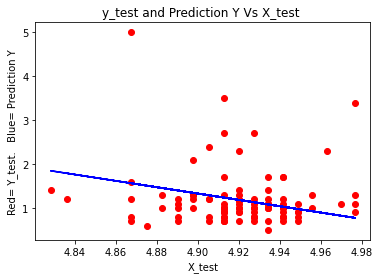

Loss function SSE =  44.61


In [88]:
import numpy as np
X=np.log(Fdf0['serum_sodium']) #implementing logX
X = X[ : ,np.newaxis]
Y=np.array(Fdf0['serum_creatinine'])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5, random_state=3) #randomstate when it splits always fixed split

# using the linear regression model
model=LinearRegression()
# fitting the data
model.fit(X_train,Y_train) #fit on training
coef_weights= model.coef_
intercept= model.intercept_
print("weights",coef_weights, 'intercept', intercept)

# predicting values
predicted=model.predict(X_test) #predictfromtest
#print("PREDICT",predicted)

plt.scatter(X_test,Y_test, color='red')
plt.plot(X_test, predicted, color='blue') 
plt.title('y_test and Prediction Y Vs X_test ')
plt.xlabel('X_test')
plt.ylabel('Red= Y_test.   Blue= Prediction Y')
plt.show()

#then estimate the loss function (SSE sum of the squared of residuals) #error
#calculate sse
sse = np.sum((predicted - Y_test)**2)
print("Loss function SSE = ", round(sse, 2))

**y = a log x + b (GLM - generalized linear model)for deceased:**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


weights [-6.5194666] intercept 33.677983686504504


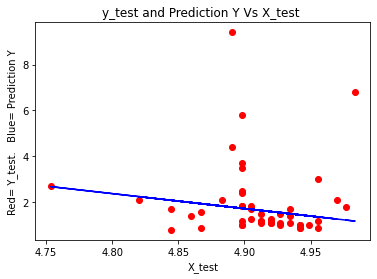

Loss function SSE =  132.87


In [107]:
import numpy as np
X=np.log(Fdf1['serum_sodium']) #implementing logX
X = X[ : ,np.newaxis]
Y=np.array(Fdf1['serum_creatinine'])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5, random_state=3) #randomstate when it splits always fixed split

# using the linear regression model
model=LinearRegression()
# fitting the data
model.fit(X_train,Y_train) #fit on training
coef_weights= model.coef_
intercept= model.intercept_
print("weights",coef_weights, 'intercept', intercept)

# predicting values
predicted=model.predict(X_test) #predictfromtest
#print("PREDICT",predicted)

plt.scatter(X_test,Y_test, color='red')
plt.plot(X_test, predicted, color='blue') 
plt.title('y_test and Prediction Y Vs X_test ')
plt.xlabel('X_test')
plt.ylabel('Red= Y_test.   Blue= Prediction Y')
plt.show()

#then estimate the loss function (SSE sum of the squared of residuals) #error
#calculate sse
sse = np.sum((predicted - Y_test)**2)
print("Loss function SSE = ", round(sse, 2))

**MODEL 5:** log y = a log x + b (GLM - generalized linear model) for survivors**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


weights [-4.03713222] intercept 19.950834125190674


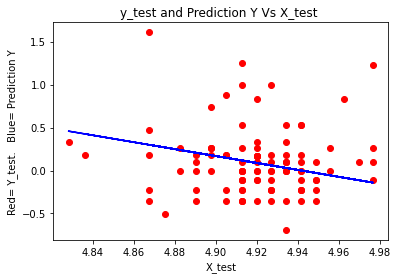

Loss function SSE =  15.91


In [86]:
import numpy as np
X=np.log(Fdf0['serum_sodium']) #implementing logX
X = X[ : ,np.newaxis]
Y=np.log(Fdf0['serum_creatinine']) #logY
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5, random_state=3) #randomstate when it splits always fixed split

# using the linear regression model
model=LinearRegression()
# fitting the data
model.fit(X_train,Y_train) #fit on training
coef_weights= model.coef_
intercept= model.intercept_
print("weights",coef_weights, 'intercept', intercept)

# predicting values
predicted=model.predict(X_test) #predictfromtest
#print("PREDICT",predicted)

plt.scatter(X_test,Y_test, color='red')
plt.plot(X_test, predicted, color='blue') 
plt.title('y_test and Prediction Y Vs X_test ')
plt.xlabel('X_test')
plt.ylabel('Red= Y_test.   Blue= Prediction Y')
plt.show()

#then estimate the loss function (SSE sum of the squared of residuals) #error
#calculate sse
sse = np.sum((predicted - Y_test)**2)
print("Loss function SSE = ", round(sse, 2))

log y = a log x + b (GLM - generalized linear model) for deceased:

weights [-4.70388504] intercept 23.46093759865125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


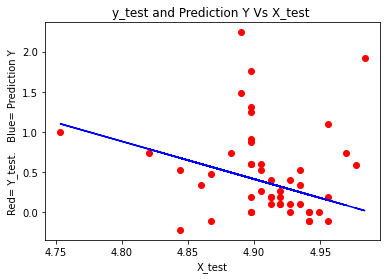

Loss function SSE =  16.05


In [109]:
import numpy as np
X=np.log(Fdf1['serum_sodium']) #implementing logX
X = X[ : ,np.newaxis]
Y=np.log(Fdf1['serum_creatinine']) #logY
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5, random_state=3) #randomstate when it splits always fixed split

# using the linear regression model
model=LinearRegression()
# fitting the data
model.fit(X_train,Y_train) #fit on training
coef_weights= model.coef_
intercept= model.intercept_
print("weights",coef_weights, 'intercept', intercept)

# predicting values
predicted=model.predict(X_test) #predictfromtest
#print("PREDICT",predicted)

plt.scatter(X_test,Y_test, color='red')
plt.plot(X_test, predicted, color='blue') 
plt.title('y_test and Prediction Y Vs X_test ')
plt.xlabel('X_test')
plt.ylabel('Red= Y_test.   Blue= Prediction Y')
plt.show()

#then estimate the loss function (SSE sum of the squared of residuals) #error
#calculate sse
sse = np.sum((predicted - Y_test)**2)
print("Loss function SSE = ", round(sse, 2))

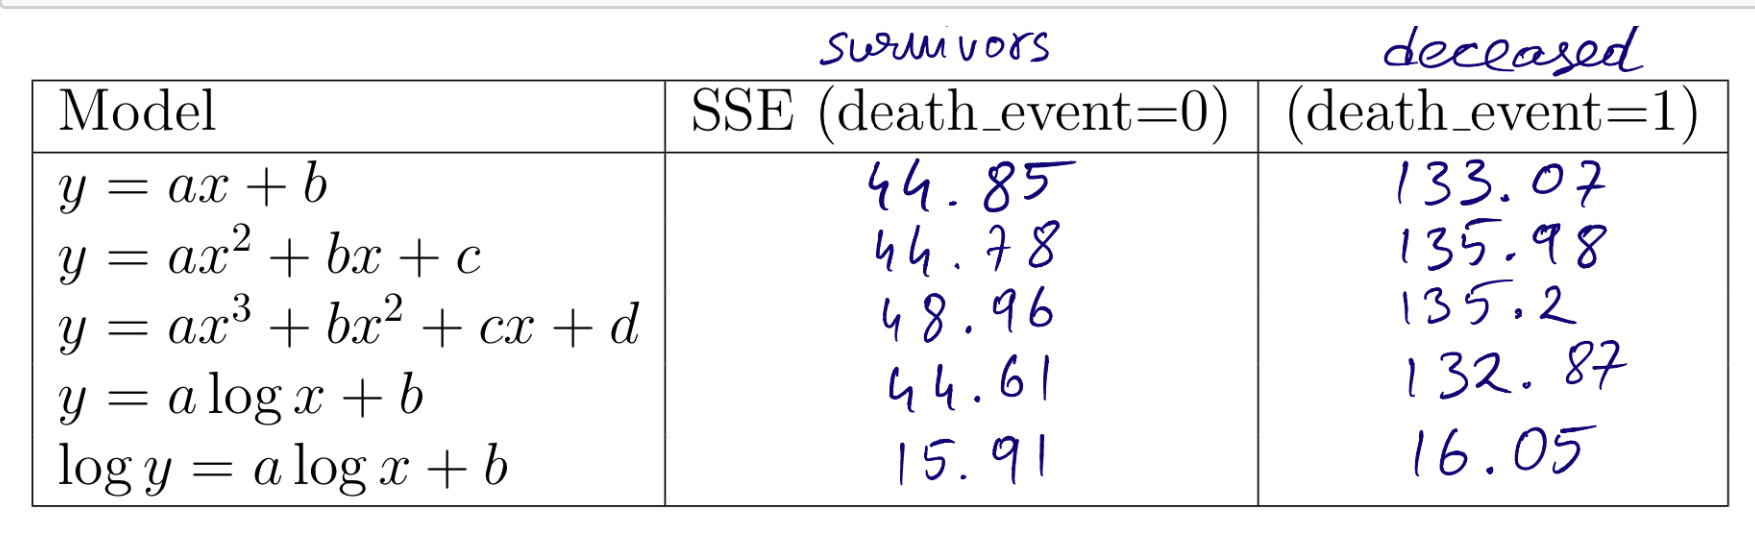

1. which model was the best (smallest SSE) for surviving pa-
tients? for deceased patients?
Model5 (GLM - generalized linear model) was the best (smallest SSE) for both surviving patients and for deceased patients

2. which model was the worst (largest SSE) for surving pa-
tients? for deceased patients?
Model3 (Cubic spline) was the worst for surviving patients and Model 2(Quadratic) was the worst for decesed patients.